<a href="https://colab.research.google.com/github/nisharajupal/Data-science-Assignment/blob/main/Assignment_05_Multilinear_Regression_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-05-Multilinear_Regression_Q1

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")] 





Model -- model of the car


Price -- Offer Price in EUROs

Age_08_04 -- Age in months as in August 2004

Mfg_Month -- Manufacturing month (1-12)

Mfg_Year -- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color -- Metallic Color? (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic -- Automatic ( (Yes=1, No=0)

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders -- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms


Below values are in boolean format/dummy format


Mfr_Guarantee -- Within Manufacturer's Guarantee period (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee (Yes=1, No=0)

Guarantee_Period -- Guarantee period in months

ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag (Yes=1, No=0)

Airbag_2 -- Passenger Airbag (Yes=1, No=0)

Airco -- Airconditioning (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning (Yes=1, No=0)

Boardcomputer -- Boardcomputer (Yes=1, No=0)

CD_Player -- CD Player (Yes=1, No=0)

Central_Lock -- Central Lock (Yes=1, No=0)

Powered_Windows -- Powered Windows (Yes=1, No=0)

Power_Steering -- Power Steering (Yes=1, No=0)

Radio -- Radio (Yes=1, No=0)

Mistlamps -- Mistlamps (Yes=1, No=0)

Sport_Model -- Sport Model (Yes=1, No=0)

Backseat_Divider -- Backseat Divider (Yes=1, No=0)

Metallic_Rim --Metallic Rim (Yes=1, No=0)

Radio_cassette -- Radio Cassette (Yes=1, No=0)

Tow_Bar -- Tow Bar (Yes=1, No=0) 

# import libreries

In [2]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

In [3]:
swami = pd.read_csv('/content/ToyotaCorolla.csv',encoding= 'latin1')
swami

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
swami.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [5]:
swami.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

# EDA

In [6]:
swami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
swami = swami[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
swami.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
swami.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# RENAME

In [9]:
swami = swami.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
swami.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
swami[swami.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
swami1=swami.drop_duplicates().reset_index(drop=True)
swami1.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [12]:
swami1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# Scatterplot between variables along with histograms

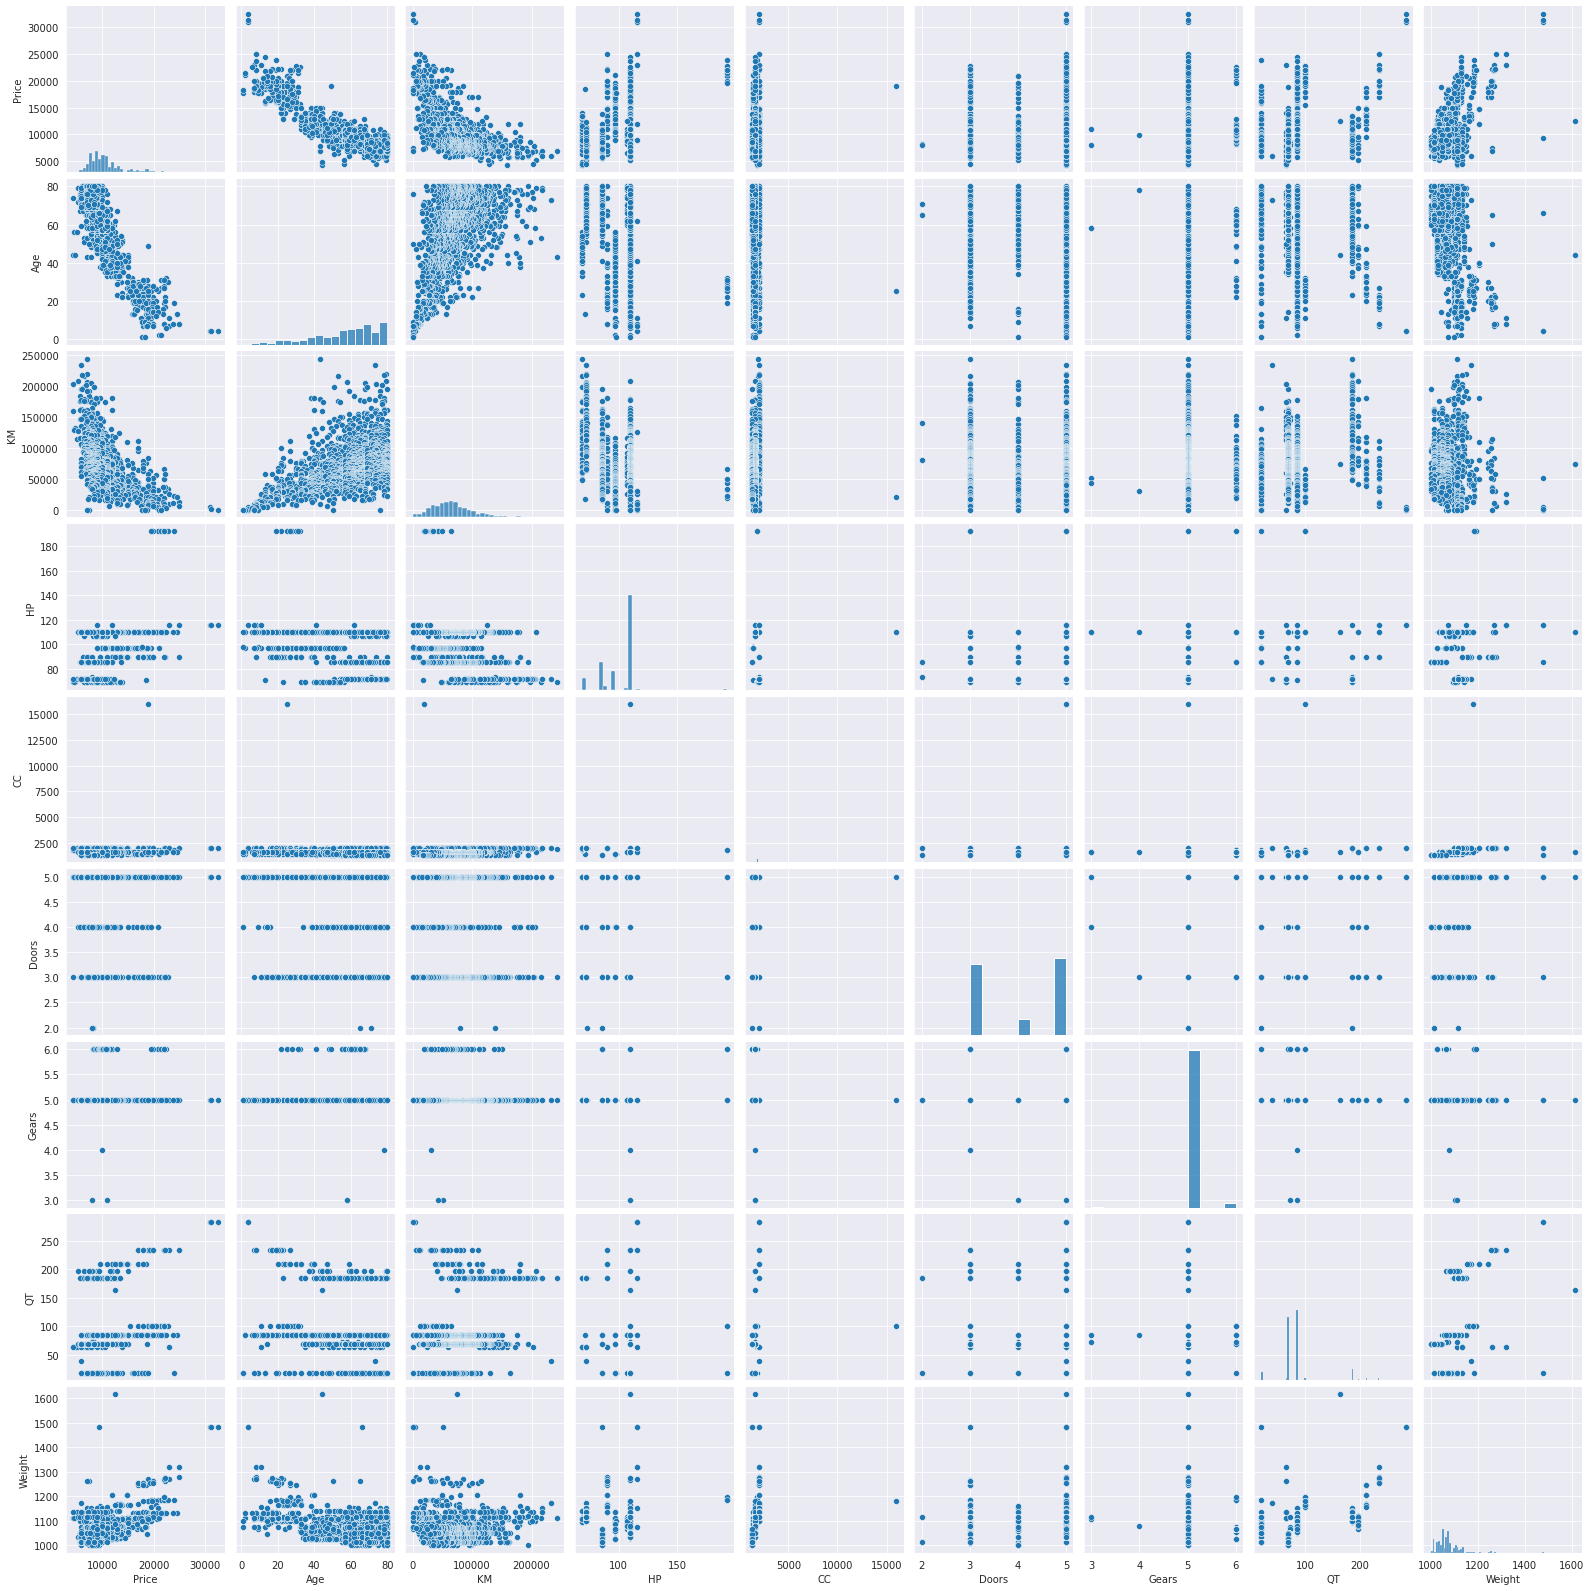

In [13]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(swami1)

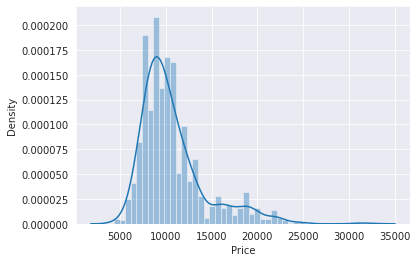

In [14]:
#Visualization of data
import seaborn as sns
sns.distplot(swami1['Price'])

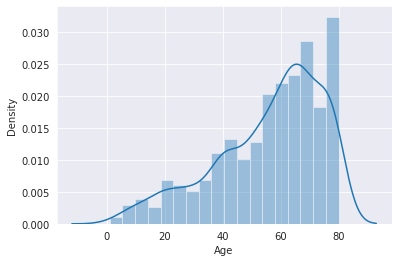

In [15]:
sns.distplot(swami1['Age'])

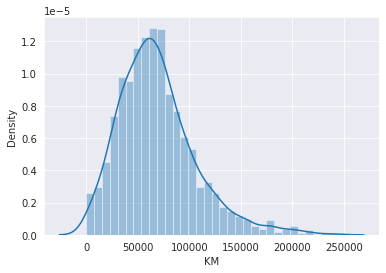

In [16]:
sns.distplot(swami1['KM'])

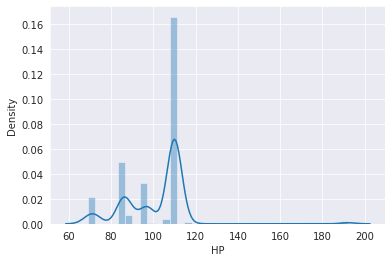

In [17]:
sns.distplot(swami1['HP'])

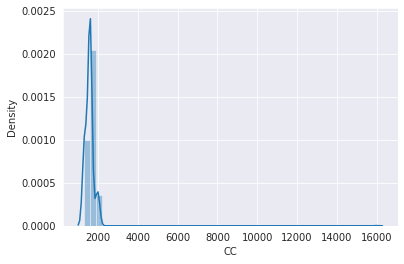

In [18]:
sns.distplot(swami1['CC'])

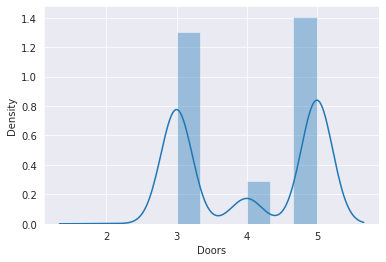

In [19]:
sns.distplot(swami1['Doors'])

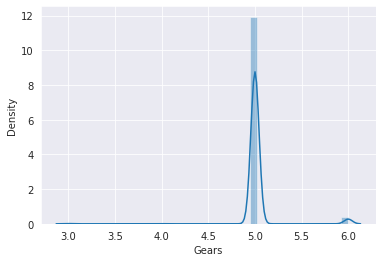

In [20]:
sns.distplot(swami1['Gears'])

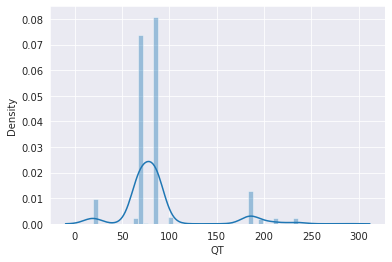

In [21]:
sns.distplot(swami1['QT'])

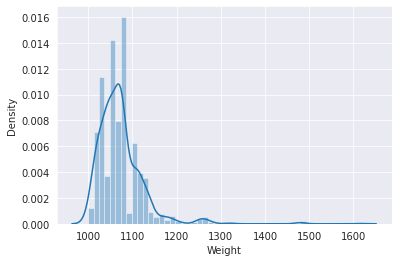

In [22]:
sns.distplot(swami1['Weight'])

#Model building

In [26]:
import statsmodels.formula.api as smf 
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=swami1).fit()

In [27]:
model.params  

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

#T-value 

In [28]:
print(np.round(model.tvalues,5))

Intercept    -3.87527
Age         -46.55188
KM          -16.55242
HP           11.20972
CC           -1.31644
Doors        -0.02301
Gears         3.03456
QT            2.94420
Weight       15.76066
dtype: float64


# P-value

In [29]:
print(np.round(model.pvalues,5))

Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64


# 
Simple Linear Regression Models

Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
Also finding their tvalues and pvalues

SLR FOR Doors


In [30]:
slr=smf.ols('Price~Doors',data = swami1).fit() #Simple lR for each variables
#t and p-Values
print(round(slr.tvalues,5), '\n', round(slr.pvalues,5))

Intercept    19.42155
Doors         7.07052
dtype: float64 
 Intercept    0.0
Doors        0.0
dtype: float64


# SLR FOR CC

In [31]:
slr=smf.ols('Price~CC',data = swami1).fit() #Simple lR for each variables
#t and p-Values
print(round(slr.tvalues,5), '\n', round(slr.pvalues,5))

Intercept    24.87959
CC            4.74504
dtype: float64 
 Intercept    0.0
CC           0.0
dtype: float64


# SLR FOR Door & CC

In [32]:
ml_dc=smf.ols('Price~Doors+CC',data = swami1).fit() 
#t and p-Values
print(round(ml_dc.tvalues,5), '\n', round(ml_dc.pvalues,5)) #result are significant

Intercept    12.78634
Doors         6.75224
CC            4.26801
dtype: float64 
 Intercept    0.00000
Doors        0.00000
CC           0.00002
dtype: float64


In [33]:
ml_dc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.55e-15
Time:                        03:39:31   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
CC             0.9398      0.220      4.268      0.000       0.508       1.372
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Validation factor:Calculating VIF (Variance Inflation Factor)

## (1) Collinearity Problem Check

In [34]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight', data=swami1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight', data=swami1).fit().rsquared
vif_KM=1/1-(rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=swami1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=swami1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=swami1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=swami1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=swami1).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=swami1).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,Vif
0,Age,1.876236
1,KM,0.569094
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


#(2)Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

In [35]:
model.resid #Errors

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

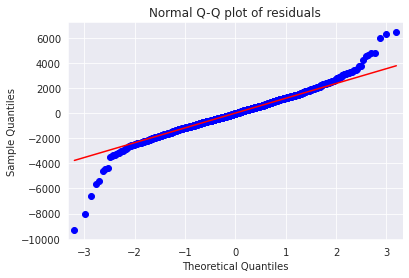

In [36]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [37]:
list(np.where(model.resid>6000))# outlier detection from above QQ plot of residuals

[array([109, 146, 522])]

In [38]:
list(np.where(model.resid<-6000))# outlier detection below -6000

[array([220, 600, 959])]

In [39]:
swami1['Predicted']= model.fittedvalues  #Predicted Value
swami1['Error']= model.resid             #Errors
swami1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1431,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1432,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1433,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


# BOXPLOT

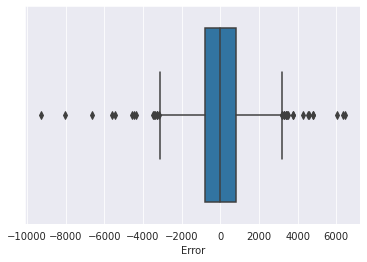

In [40]:
sns.boxplot(swami1['Error'])

# Histogram

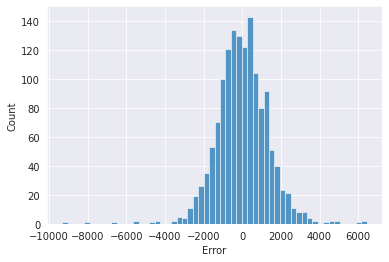

In [41]:
sns.histplot(swami1['Error'])

# Residual Plot for Homoscedasticity

In [47]:
#Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

In [48]:
def standard_values(vals): 
    return(vals-vals.mean())/vals.std() # User defined z = (x - mu)/sigma

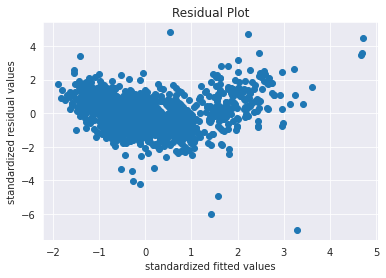

In [49]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

# Residual Vs Regressors

In [50]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)  
# exog = x-variable & endog = y-variable

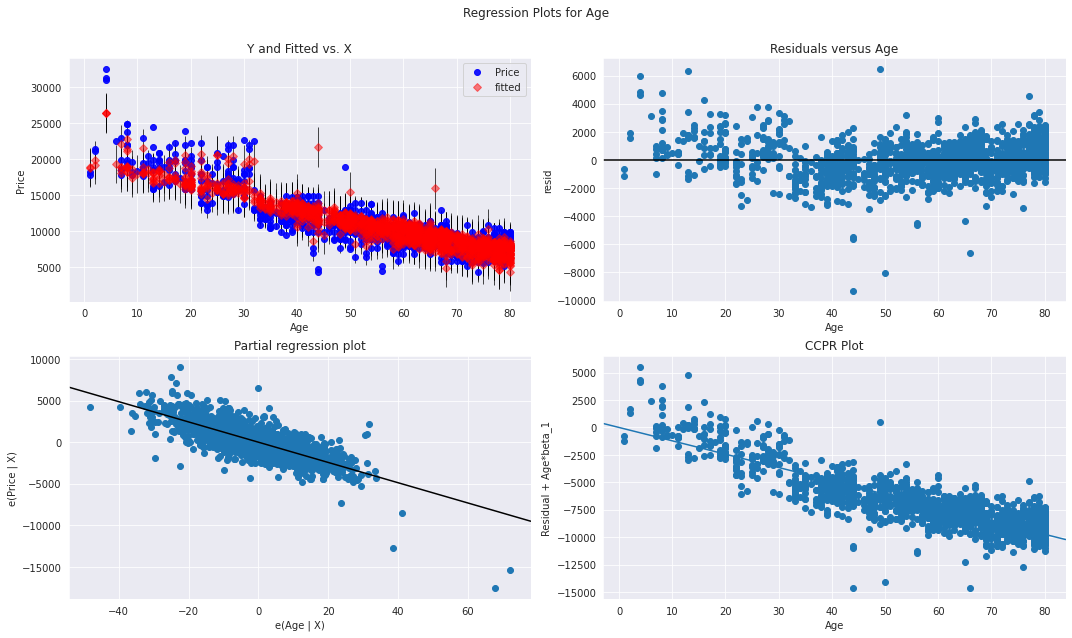

In [53]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'Age', fig=fig)
plt.show()

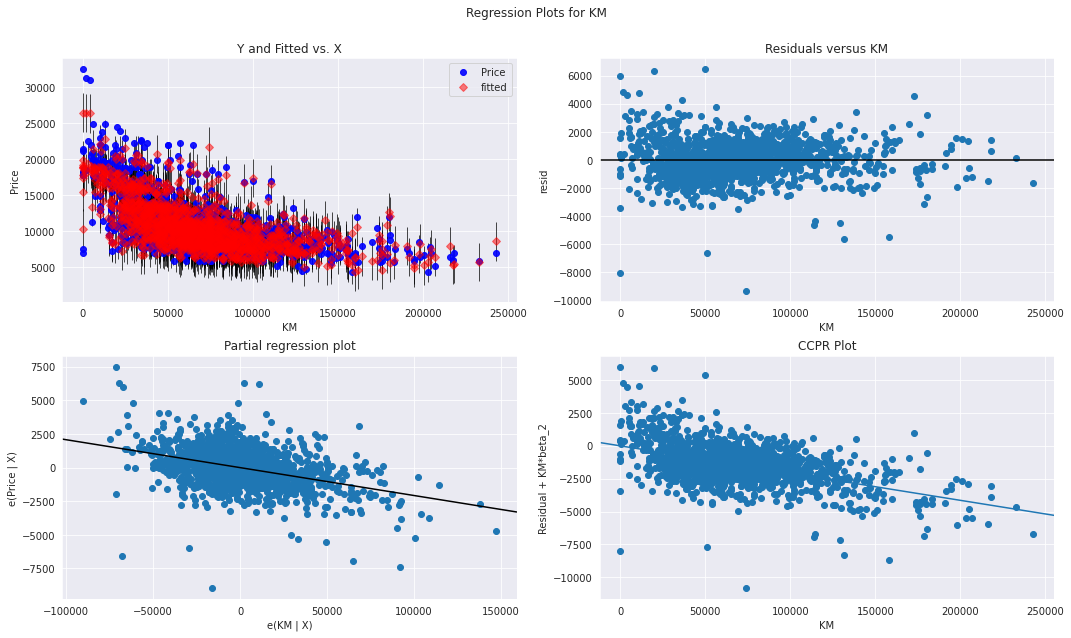

In [54]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

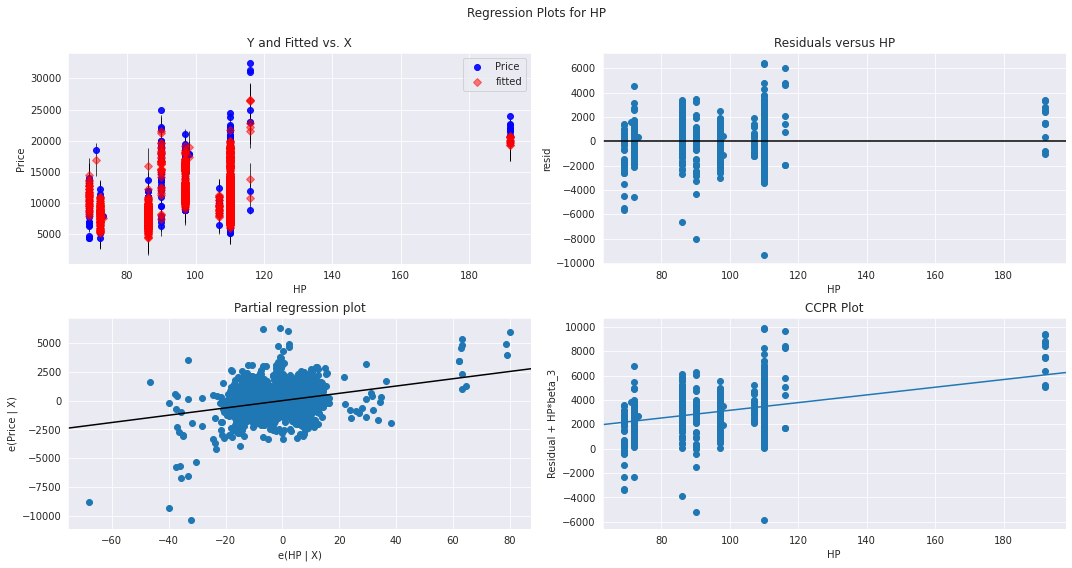

In [55]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

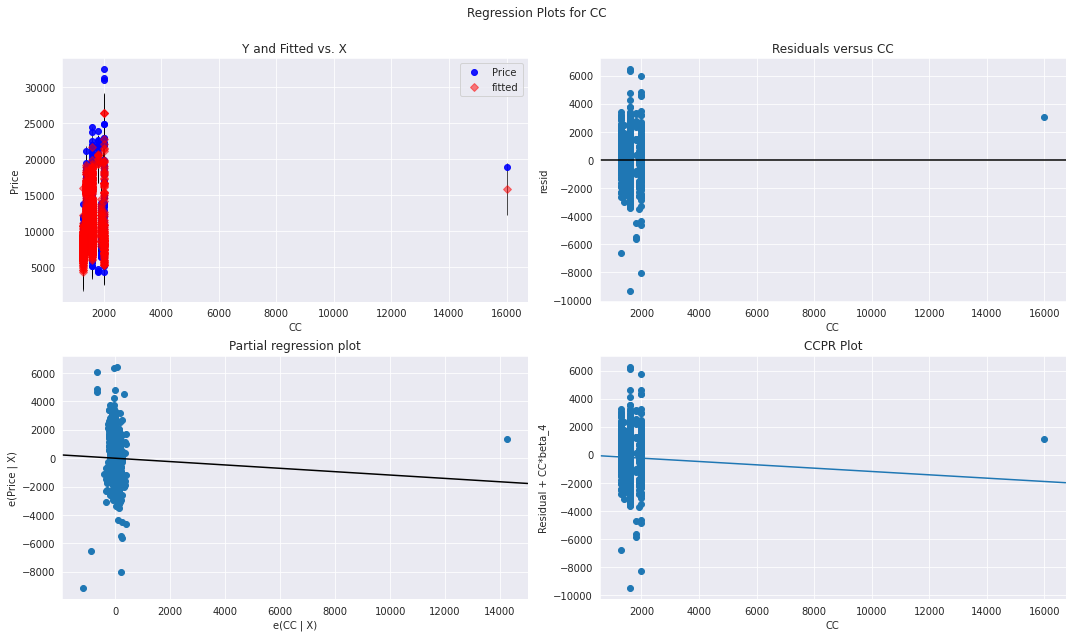

In [57]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'CC', fig=fig)
plt.show()

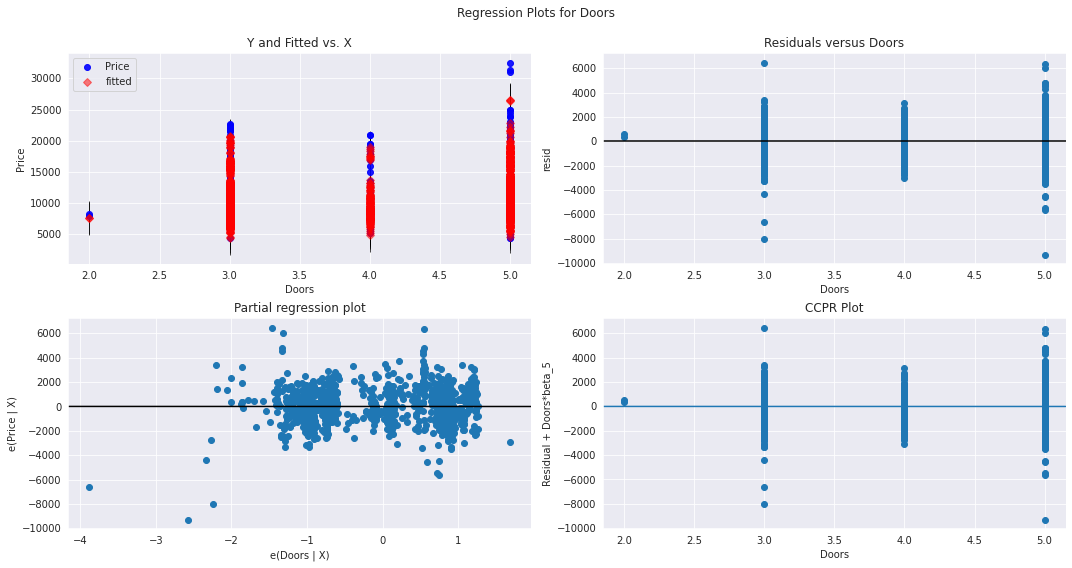

In [58]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

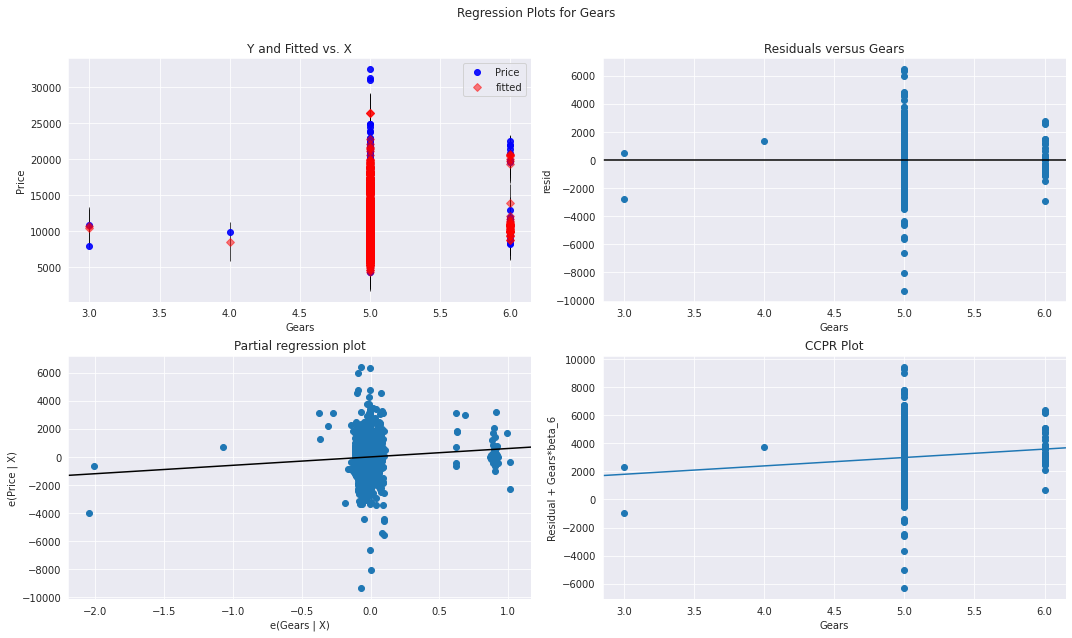

In [59]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

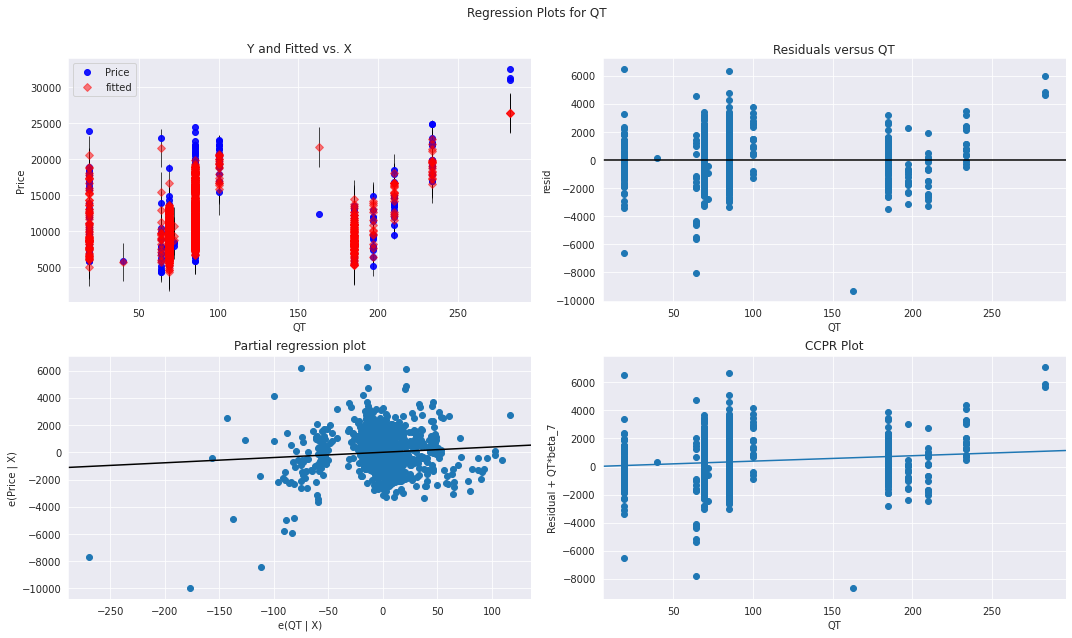

In [60]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'QT', fig=fig)
plt.show()

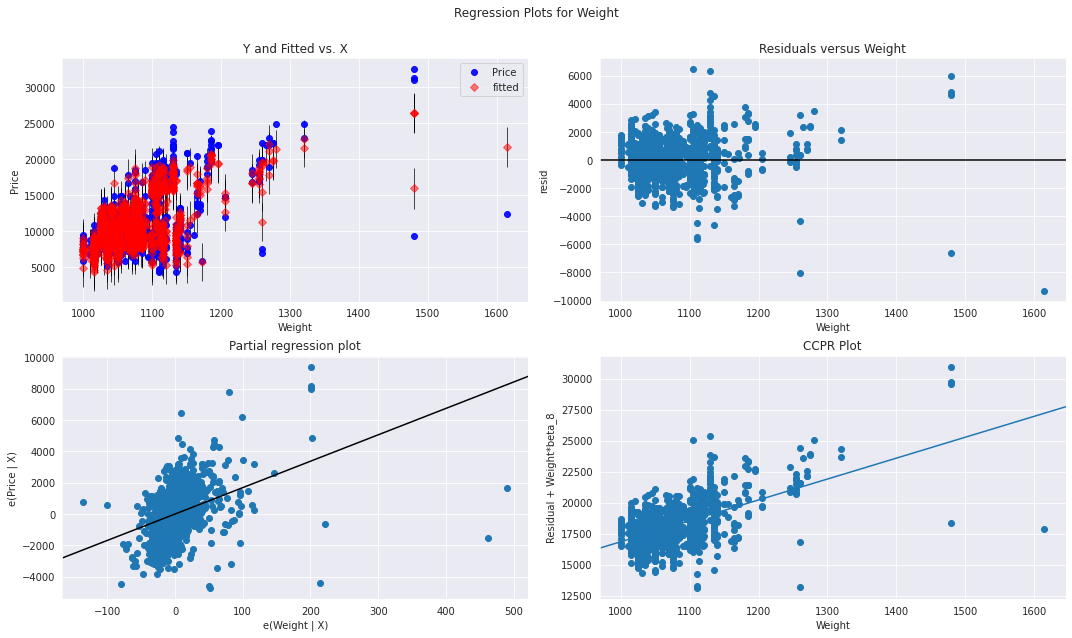

In [61]:
fig=plt.figure(figsize=(15,9))
sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

# Model Deletion Diagnostics (Detecting Influencers/Outliers)

(1) Cook's Distance:

If Cook's distance > 1, then it's an outlier


In [62]:
# Get influencers using cook's distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

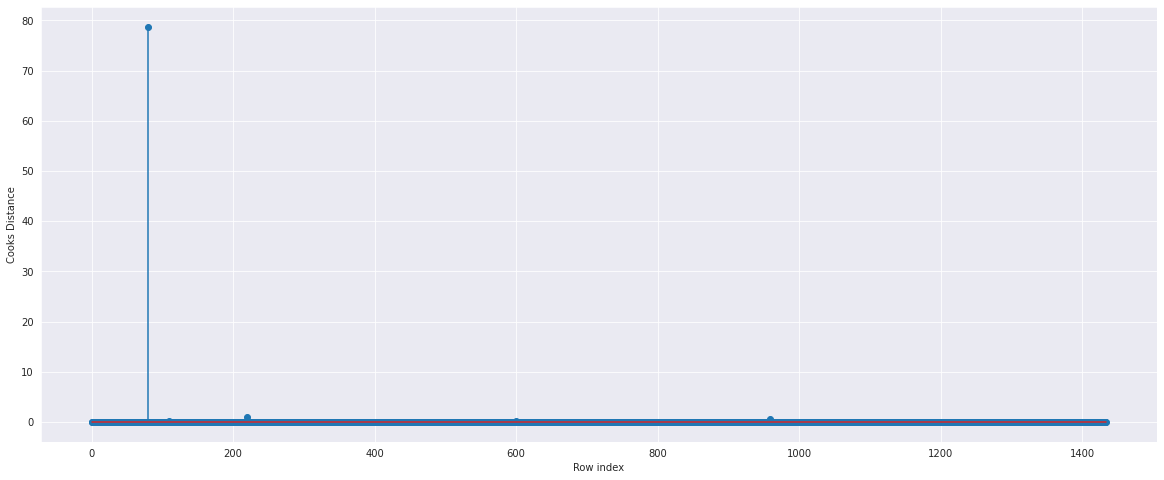

In [65]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 8))
plt.stem(np.arange(len(swami1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [66]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c)) #argmax returns index of highest value

(80, 78.72950582259465)

# High Influence points

Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers


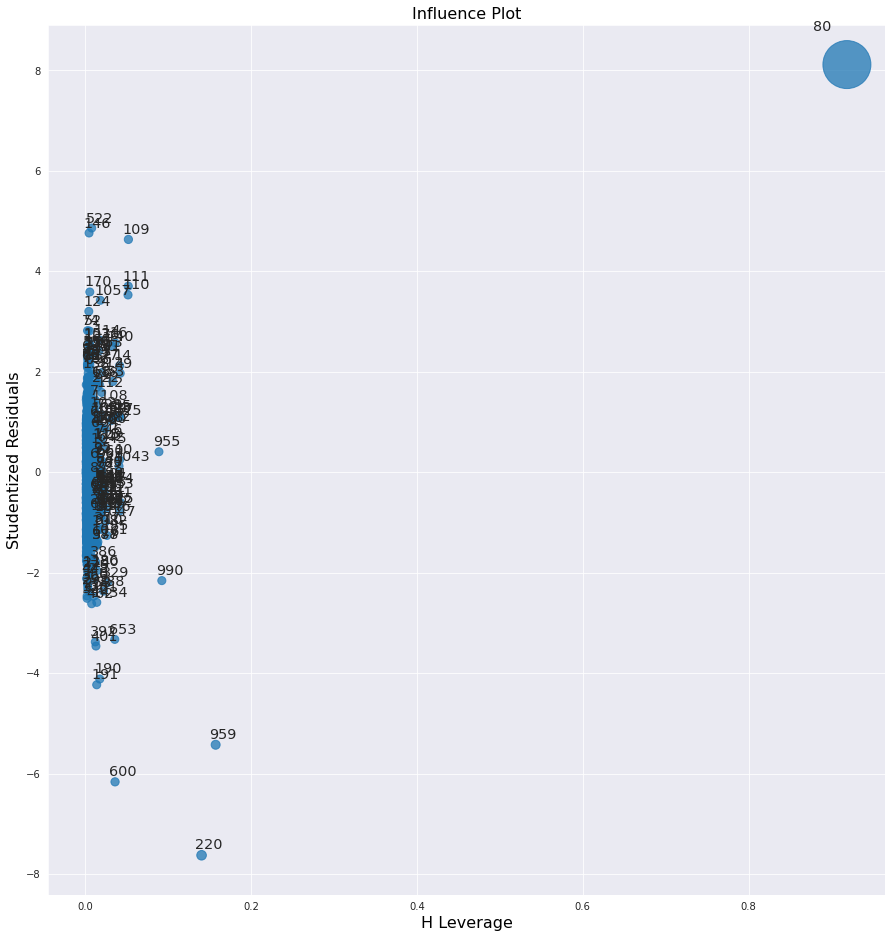

In [68]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(15,16))
fig=influence_plot(model,ax = ax)
plt.show()

In [69]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=swami1.shape[1]
n=swami1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.025087108013937282

In [70]:
#From the above plot, it is evident that data point 80 is the influencers , as it is crossing 0.020905 point in influence plot

In [74]:
swami1[swami1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
80,18950,25,20019,110,16000,5,5,100,1180,15906.167549,3043.832451


# Improving the model

In [72]:
#Load the data
df_new = swami1.copy()
df_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1431,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1432,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1433,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


In [73]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True)) 
df2=df_new.drop(df_new.index[[80]],axis=0).reset_index(drop=True)
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1430,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1431,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1432,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


# Model Deletion Diagnostics and Final Model

In [76]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df2=df2.drop(df2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df2
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [77]:
if np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df2=df2.drop(df2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df2
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [79]:
final_model.rsquared

0.8882395145171204

0.8882395145171204

# Model Predictions

In [80]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':10,"KM":45000,"HP":90,"CC":1100,"Doors":4,"Gears":5,"QT":79,"Weight":1500},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,10,45000,90,1100,4,5,79,1500


In [81]:
# Manual Prediction of Price
final_model.predict(new_data)

0    31269.319492
dtype: float64

In [82]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(df2)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

In [83]:
d_fin={'Prep_Models':['Model', 'Final_Model'], 'Rsquared':[model.rsquared, final_model.rsquared]}
table=pd.DataFrame(d_fin)
table

,Prep_Models,Rsquared
0,Model,0.883968
1,Final_Model,0.888240


# Types of regressions

In [85]:
y = swami[["Price"]]
x = swami[["Age","KM","HP","CC","Doors","Gears","QT","Weight"]]

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [88]:
y_pred = model.predict(x)
print(y_pred)

[[16812.58050518]
 [16272.35518581]
 [16800.73245987]
 ...
 [ 8454.29800682]
 [ 8578.03812148]
 [10402.43833285]]


In [89]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)
                                                    
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((1148, 8), (1148, 1), (288, 8), (288, 1))

In [92]:
#ridge regression:

from sklearn.linear_model import Ridge
ridgeR=Ridge(alpha=0.01)
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test)

ridgeR.fit(x_train, y_train)

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# ridge coefficient 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient)

Price    2.071189e+06
dtype: float64


Exception: ignored

In [93]:
#Visualization
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

ValueError: ignored